In [1]:
#################################################
#################### IMPORTS ####################
#################################################

# ---------------- #
# Common Libraries #
# ---------------- #

# Standard Imports
import os
import requests
import numpy as np
import pandas as pd
import itertools

# Plots, Graphs, & Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# --------- #
# Data Sets #
# --------- #

from pydataset import data
# Call from the vega_datasets library like so:
## df = data.

# ------------- #
# Local Imports #
# ------------- #

# importing sys
import sys

# adding 00_helper_files to the system path
sys.path.insert(0, '/Users/qmcbt/codeup-data-science/00_helper_files')

# env containing sensitive access credentials
from env import user, password, host

# Import Helper Modules
import QMCBT_00_quicktips as qt
import QMCBT_01_acquire as acq
import QMCBT_02_prepare as prep
import QMCBT_03_explore as exp
import QMCBT_04_visualize as viz
import QMCBT_05_model as mod
import QMCBT_wrangle as w

# Anomaly Detection Exercises
Using the repo setup directions, setup a new local and remote repository named anomaly-detection-exercises. 
The local version of your repo should live inside of ~/codeup-data-science. 
This repo should be named anomaly-detection-exercises

Save this work in your anomaly-detection-exercises repo. 
Then add, commit, and push your changes.

```continuous_probabilistic_methods.py``` or ```continuous_probabilistic_methods.ipynb``` 
Define a function named get_lower_and_upper_bounds that has two arguments. 
* The first argument is a pandas Series. 
* The second argument is the multiplier, which should have a default argument of 1.5.

## 1. Using lemonade.csv dataset and focusing on continuous variables:

In [2]:
# Assign url
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

# Read in CSV
df = pd.read_csv(url)
df.T

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
Date,1/1/17,1/2/17,1/3/17,1/4/17,1/5/17,1/6/17,1/7/17,1/8/17,1/9/17,1/10/17,...,12/22/17,12/23/17,12/24/17,12/25/17,12/26/17,12/27/17,12/28/17,12/29/17,12/30/17,12/31/17
Day,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,...,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Temperature,27.0,28.9,34.5,44.1,42.4,25.3,32.9,37.5,38.1,43.4,...,30.9,42.4,35.8,35.5,28.9,42.7,37.8,39.5,30.9,15.1
Rainfall,2.0,1.33,1.33,1.05,1.0,1.54,1.54,1.18,1.18,1.05,...,1.54,1.11,1.25,1.25,1.43,1.0,1.25,1.25,1.43,2.5
Flyers,15,15,27,28,33,23,19,28,20,33,...,17,20,26,19,23,33,32,17,22,9
Price,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
Sales,10,13,15,17,18,11,13,15,17,18,...,13,18,16,15,13,19,16,15,13,7


In [3]:
# Use custom function to add Day, Month, Year Features
prep.dmy_conversion(df, 'Date')

,Day,Temperature,Rainfall,Flyers,Price,Sales,day,day_of_week,weekday_number,year,month,month_number
Date,,,,,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,1,Sunday,7,2017,January,1
2017-01-02,Monday,28.9,1.33,15,0.5,13,2,Monday,1,2017,January,1
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,3,Tuesday,2,2017,January,1
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,4,Wednesday,3,2017,January,1
2017-01-05,Thursday,42.4,1.00,33,0.5,18,5,Thursday,4,2017,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,Wednesday,42.7,1.00,33,0.5,19,27,Wednesday,3,2017,December,12
2017-12-28,Thursday,37.8,1.25,32,0.5,16,28,Thursday,4,2017,December,12
2017-12-29,Friday,39.5,1.25,17,0.5,15,29,Friday,5,2017,December,12


In [4]:
# Use custom fynction to set index to date
df = prep.set_index(df, 'Date')

In [5]:
df

,Day,Temperature,Rainfall,Flyers,Price,Sales,day,day_of_week,weekday_number,year,month,month_number
Date,,,,,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,1,Sunday,7,2017,January,1
2017-01-02,Monday,28.9,1.33,15,0.5,13,2,Monday,1,2017,January,1
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,3,Tuesday,2,2017,January,1
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,4,Wednesday,3,2017,January,1
2017-01-05,Thursday,42.4,1.00,33,0.5,18,5,Thursday,4,2017,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,Wednesday,42.7,1.00,33,0.5,19,27,Wednesday,3,2017,December,12
2017-12-28,Thursday,37.8,1.25,32,0.5,16,28,Thursday,4,2017,December,12
2017-12-29,Friday,39.5,1.25,17,0.5,15,29,Friday,5,2017,December,12


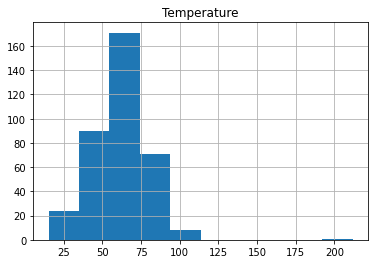

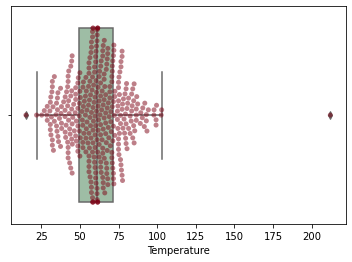

___________________________________________________________


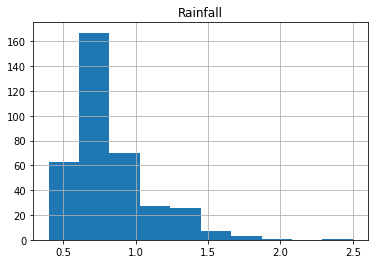

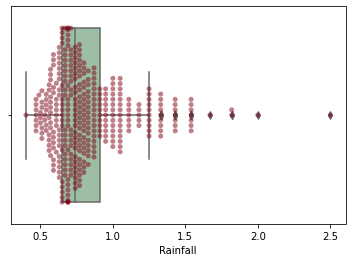

___________________________________________________________


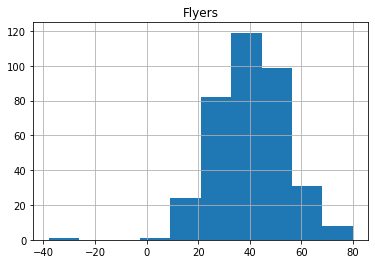

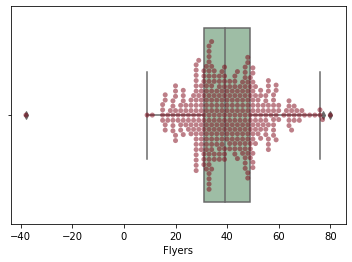

___________________________________________________________


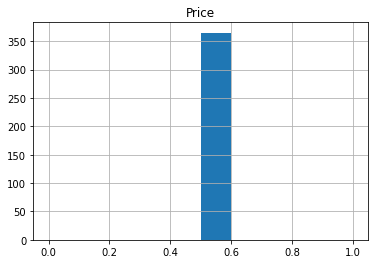

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 91.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


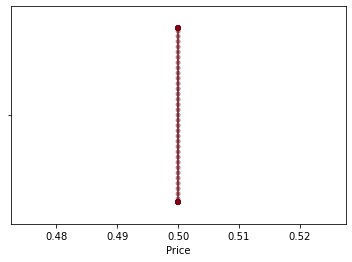

___________________________________________________________


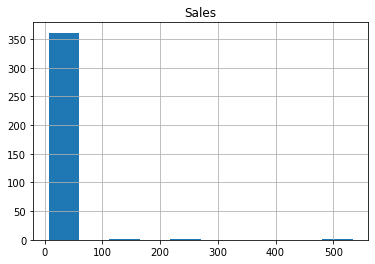

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 64.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


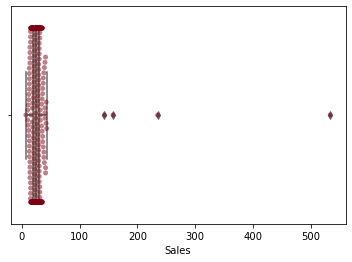

___________________________________________________________


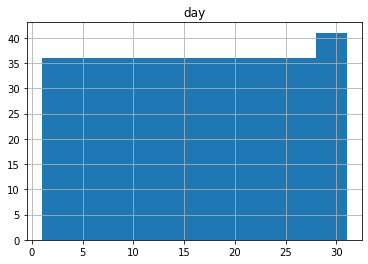

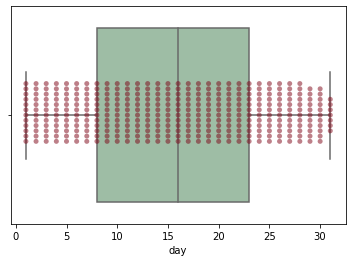

___________________________________________________________


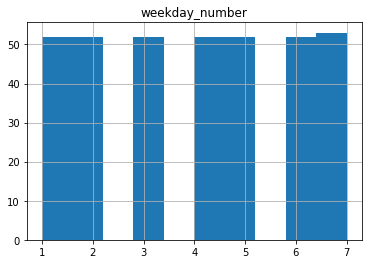

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


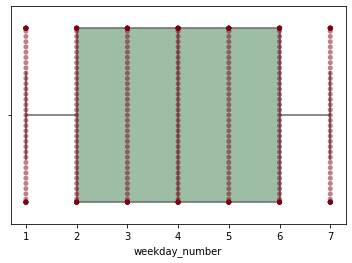

___________________________________________________________


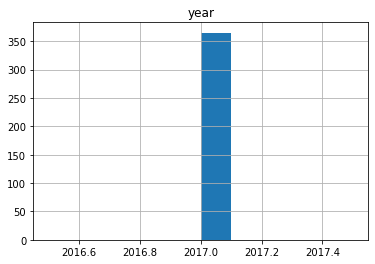

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 91.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


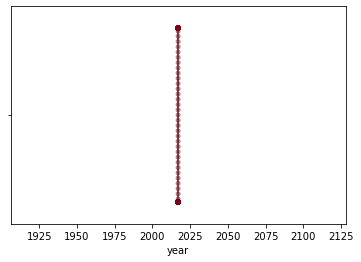

___________________________________________________________


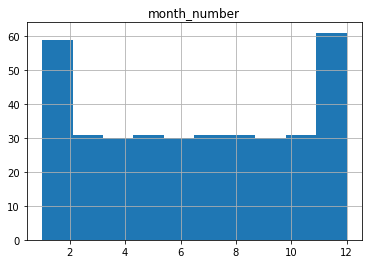

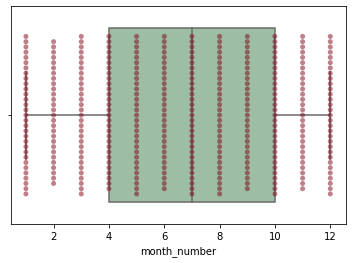

___________________________________________________________


In [6]:
# Use custom function to visualize distribution across every column in the DataFrame
viz.plot_distribution(df)

<div class="alert alert-info">
    
    
### INITIAL THOUGHTS
* Temperature has a single entry below 25 and a single entry above 200
* Rainfall has a few entries above 2
* Flyers has a couple entries in the outer fence
    * one close to 80 and... 
    * one in the negative (-40ish)
* Sales has a few entries in the outside fence above 100


## Temperature

In [7]:
# Check temperature above 100
df[df.Temperature > 100]

,Day,Temperature,Rainfall,Flyers,Price,Sales,day,day_of_week,weekday_number,year,month,month_number
Date,,,,,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,11,Saturday,6,2017,February,2
2017-06-26,Monday,102.6,0.47,60,0.5,42,26,Monday,1,2017,June,6
2017-07-01,Saturday,102.9,0.47,59,0.5,143,1,Saturday,6,2017,July,7


In [8]:
# check temperature below 25
df[df.Temperature < 25]

,Day,Temperature,Rainfall,Flyers,Price,Sales,day,day_of_week,weekday_number,year,month,month_number
Date,,,,,,,,,,,,
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,5,Tuesday,2,2017,December,12
2017-12-31,Sunday,15.1,2.50,9,0.5,7,31,Sunday,7,2017,December,12


<div class="alert alert-info">

    
### OBSERVATIONS    
* There is definately something wrong with that 212 degree day in the winter.
* Besides that, the other temperature variances appear to be within reasonably normal limits.
* We will impute the 212 degree entry that appears to be a date imput error of FEB 12th.
    * We will impute the error with the average of the day before and the day after

In [9]:
# Look at the day before and after 2017-02-11.
df.loc["2017-02-10":"2017-02-12"]

,Day,Temperature,Rainfall,Flyers,Price,Sales,day,day_of_week,weekday_number,year,month,month_number
Date,,,,,,,,,,,,
2017-02-10,Friday,50.0,0.91,40,0.5,20,10,Friday,5,2017,February,2
2017-02-11,Saturday,212.0,0.91,35,0.5,21,11,Saturday,6,2017,February,2
2017-02-12,Sunday,55.6,0.83,41,0.5,22,12,Sunday,7,2017,February,2


In [10]:
(50+55.6)/2

52.8

In [11]:
# impute the error with the average of the day before and the day after
df.loc[df.Temperature == 212, "Temperature"] = 52.8

In [12]:
# Check our work
df.loc["2017-02-10":"2017-02-12"]

,Day,Temperature,Rainfall,Flyers,Price,Sales,day,day_of_week,weekday_number,year,month,month_number
Date,,,,,,,,,,,,
2017-02-10,Friday,50.0,0.91,40,0.5,20,10,Friday,5,2017,February,2
2017-02-11,Saturday,52.8,0.91,35,0.5,21,11,Saturday,6,2017,February,2
2017-02-12,Sunday,55.6,0.83,41,0.5,22,12,Sunday,7,2017,February,2


## Rainfall

In [13]:
# Check rainfall greater than 2.0
df[df.Rainfall > 2]

,Day,Temperature,Rainfall,Flyers,Price,Sales,day,day_of_week,weekday_number,year,month,month_number
Date,,,,,,,,,,,,
2017-12-31,Sunday,15.1,2.5,9,0.5,7,31,Sunday,7,2017,December,12


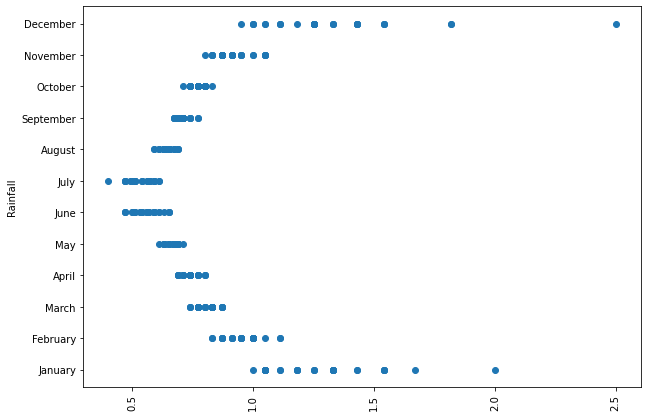

In [21]:
plt.figure(figsize=(10,7))
plt.ylabel("Rainfall")
plt.scatter(df.Rainfall, df.month)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-info">

## Observation
* Nothing significantly out of the ordinary for for a slightly elevated day of rainfall in a heavy rain month.

## Flyers

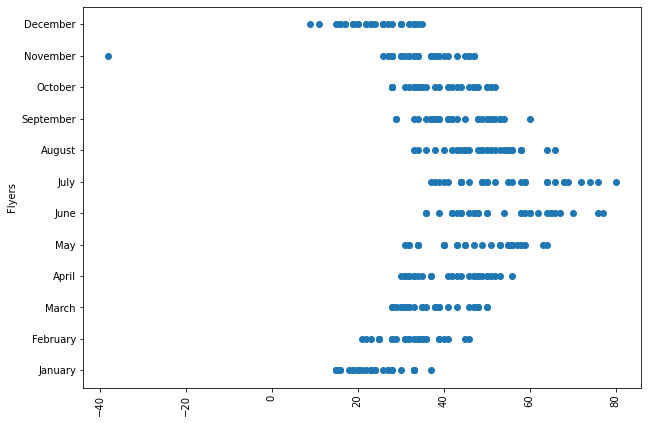

In [22]:
plt.figure(figsize=(10,7))
plt.ylabel("Flyers")
plt.scatter(df.Flyers, df.month)
plt.xticks(rotation = 90)
plt.show()

In [23]:
# look at the other entries in NOV
df.loc["2017-11-01":"2017-11-30"]

,Day,Temperature,Rainfall,Flyers,Price,Sales,day,day_of_week,weekday_number,year,month,month_number
Date,,,,,,,,,,,,
2017-11-01,Wednesday,51.9,0.83,43,0.5,23,1,Wednesday,3,2017,November,11
2017-11-02,Thursday,53.6,0.91,46,0.5,22,2,Thursday,4,2017,November,11
2017-11-03,Friday,51.3,0.87,38,0.5,21,3,Friday,5,2017,November,11
2017-11-04,Saturday,48.7,0.95,39,0.5,19,4,Saturday,6,2017,November,11
2017-11-05,Sunday,55.9,0.87,45,0.5,23,5,Sunday,7,2017,November,11
2017-11-06,Monday,51.6,0.91,28,0.5,22,6,Monday,1,2017,November,11
2017-11-07,Tuesday,52.3,0.91,34,0.5,21,7,Tuesday,2,2017,November,11
2017-11-08,Wednesday,44.7,0.95,37,0.5,19,8,Wednesday,3,2017,November,11
2017-11-09,Thursday,53.9,0.83,33,0.5,23,9,Thursday,4,2017,November,11


In [26]:
# show the date index of the minimum Flyer count
df.Flyers.idxmin()

Timestamp('2017-11-21 00:00:00')

<div class="alert alert-info">

## Observations
* The upper outer fence value of 80 is not uncharacteristic given that month already has the highest rate of flyers distribution and the variance is not too far outside the inner fence.
* A negative amount of fliers however, is not likely or even possible unless we took back flyers that were previously handed out.
    * We will need to impute the negative number.
    * It looks as though the entry was a simple fat finger error and should not have been negative.

In [27]:
# Change all values in the Flyers column to positive numbers
df.Flyers = df.Flyers.abs()

In [28]:
# Check our work
df.loc["2017-11-21"].Flyers

38

## Sales

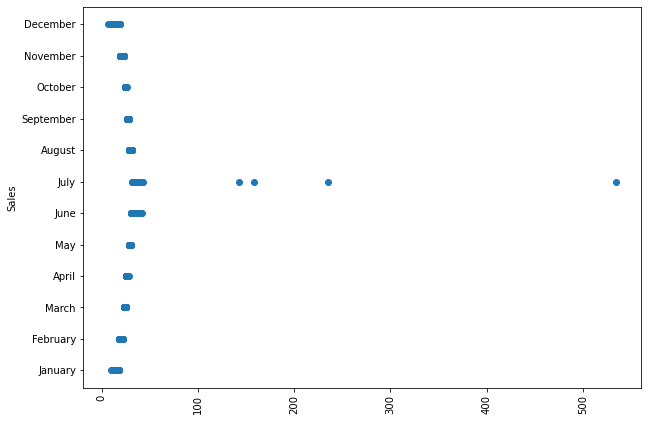

In [29]:
plt.figure(figsize=(10,7))
plt.ylabel("Sales")
plt.scatter(df.Sales, df.month)
plt.xticks(rotation = 90)
plt.show()

In [68]:
# Look at all sales greater than 50
df[df.Sales > 50]

,Day,Temperature,Rainfall,Flyers,Price,Sales,day,day_of_week,weekday_number,year,month,month_number
Date,,,,,,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,1,Saturday,6,2017,July,7
2017-07-02,Sunday,93.4,0.51,68,0.5,158,2,Sunday,7,2017,July,7
2017-07-03,Monday,81.5,0.54,68,0.5,235,3,Monday,1,2017,July,7
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,4,Tuesday,2,2017,July,7


In [64]:
# Create DataFrame for all entries in JUL
JUL_df = df.loc["2017-07-01":"2017-07-31"]

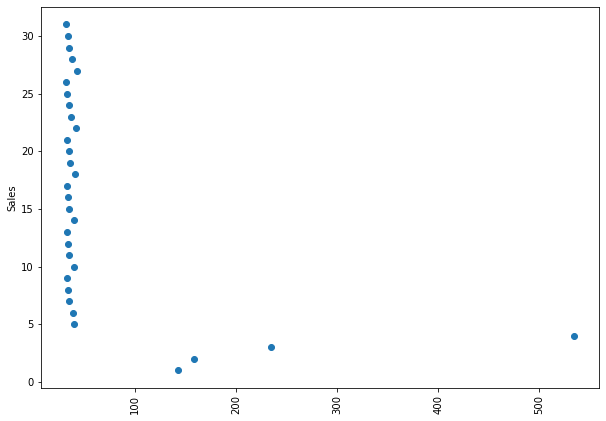

In [67]:
# show sales by day for just JUL
plt.figure(figsize=(10,7))
plt.ylabel("Sales")
plt.scatter(JUL_df.Sales, JUL_df.day)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-info">

    
## Observations
* There are some extremely high sales in JUL
* After further research, all of the high sales occur on the 1-5 of JUL
    * This is consistant with the 4th of July weekend Sat, Sun, Mon, & Tues
    * Temperatures for those days were also high, ranging between 81.5 and 102.9

* Use the IQR Range Rule and the upper and lower bounds to identify the **lower outliers** of each column of lemonade.csv, using the multiplier of 1.5. Do these **lower outliers** make sense? Which outliers should be kept?

* Use the IQR Range Rule and the upper and upper bounds to identify the **upper outliers** of each column of lemonade.csv, using the multiplier of 1.5. Do these **upper outliers** make sense? Which outliers should be kept?

* Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the **outliers below the lower bound** in each colum of lemonade.csv. Do these **lower outliers** make sense? Which outliers should be kept?

* Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers **above the upper_bound** in each colum of lemonade.csv. Do these **upper outliers** make sense? Which outliers should be kept?

## 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
* Use a 2 sigma decision rule to isolate the outliers.
    * Do these make sense?
    * Should certain outliers be kept or removed?

## 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv